<a href="https://colab.research.google.com/github/nicocarrion1/DiploDatos_AyV_G5/blob/main/Entregable_1_Ejercicio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---
## Trabajo práctico entregable - Parte 1

<font color='orange'> 

**Grupo 5**: Nicolás Carrión, Génesis Núñez Sanchez, Magdalena Sella, Exequiel Santucho
</font>

###Ejercicio 1


In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

seaborn.set_context('paper')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [2]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
data = pd.read_csv(url)

df = data # Hago copia del dataframe original para trabajar en él

In [3]:
df.shape # 6095 filas
df[:5]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.0,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.0,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,Licenciatura en Sistemas,UNNE Universidad Nacional del Nordeste,"Sí, de forma particular, Sí, los pagó un emple...",Sí,Sí,SysAdmin / DevOps / SRE,"Docker, Linux, OpenStack, VMWare, Windows Server","Bash/Shell, C, CSS, HTML, Java, Javascript, PH...","jQuery, WordPress","Microsoft SQL Server, MySQL",PHPUnit,"Eclipse, Visual Studio Code",GNU/Linux,Android,"Sí, pasiva",0.0,Bruto,Full-Time,130000.0,102000.0,NaN,3,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,Licenciatura en Ciencias dela Computación,UBA - Universidad de Buenos Aires,No,No,Sí,Developer,Amazon Web Services,"CSS, HTML, Javascript, SQL, TypeScript","Angular, Node.js","Amazon DynamoDB, MongoDB, MySQL",Jest,Vim,macOS,Android,No,0.0,Porcentaje de mi sueldo,Full-Time,140000.0,106000.0,NaN,1,1,Menos de un sueldo,Performance individual,No,0.0,0,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN


# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

In [4]:
# Item 1
# complete here if you want to include more columns
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO','work_contract_type']

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [5]:
df.tools_programming_languages[:5]

0                                              Ninguno
1                             HTML, Javascript, Python
2                                              Ninguno
3    Bash/Shell, C, CSS, HTML, Java, Javascript, PH...
4               CSS, HTML, Javascript, SQL, TypeScript
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [6]:
# Item 2

# Valores faltantes y filtrado

df.isna().sum()  # Total de valores faltantes por columnas
df = df.dropna(axis=0, subset=['salary_monthly_NETO']) # Descarto filas del df donde no tengo información para el salario neto
df = df.drop(df[df.salary_monthly_BRUTO < df.salary_monthly_NETO].index) # Descarto filas del df donde salario bruto es menor que salario neto
df.shape # 5727 filas
df[:10]

# ---
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno', '')                     # Cambio 'ninguno de los anteriores' por 'ninguno', sino no elimina los registros
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:10]
# ---

,programming_language,tools_programming_languages,salary_monthly_NETO,work_contract_type,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,Full-Time,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,Full-Time,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,Full-Time,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,Full-Time,"[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,Full-Time,"[bash/shell, c, css, html, java, javascript, p..."
3,css,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,Full-Time,"[bash/shell, c, css, html, java, javascript, p..."
3,html,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,Full-Time,"[bash/shell, c, css, html, java, javascript, p..."
3,java,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,Full-Time,"[bash/shell, c, css, html, java, javascript, p..."
3,javascript,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,Full-Time,"[bash/shell, c, css, html, java, javascript, p..."
3,php,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,Full-Time,"[bash/shell, c, css, html, java, javascript, p..."


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [7]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:10]

,language,frequency
0,javascript,2355
1,sql,2037
2,html,1747
3,python,1393
4,java,1377
5,css,1178
6,bash/shell,938
7,php,828
8,.net,778
9,typescript,731


## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [8]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
interesting_languages = language_count.iloc[:10, 0] # Tomo los 10 primeros de language_count / CUIDADO, ES CASE SENSITIVE
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,work_contract_type,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,Full-Time,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,Full-Time,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,Full-Time,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,Full-Time,"[bash/shell, c, css, html, java, javascript, p..."
3,css,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,Full-Time,"[bash/shell, c, css, html, java, javascript, p..."


# Métricas

Text(0, 0.5, 'Cantidad')

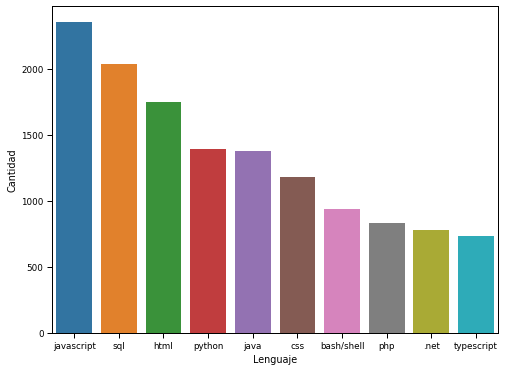

In [9]:
# Item 3
# Visualización de conteo de los 10 lenguajes más empleados
fig = plt.figure(figsize=(8,6))
ax = seaborn.countplot(x = 'programming_language',order = interesting_languages, data = filtered_df_lang)
plt.xlabel('Lenguaje')
plt.ylabel('Cantidad')


Se observa que el lenguaje mayormente empleado es `python`, en segundo lugar es `sql`.

In [10]:
#Sacamos el 2% inferior de los datos y el 5% superior, al considerarlos outliers

def clean_outliers_q3(dataset, column_name):
  #returns dataset removing outliers rows
  interesting_col =dataset[column_name]
  mask_outlier = (interesting_col <= (2.5* interesting_col.quantile(.95))) & (interesting_col >= (2.5* interesting_col.quantile(.02)))
  return dataset[mask_outlier]


df_no = clean_outliers_q3(filtered_df_lang,'salary_monthly_NETO')


Text(0, 0.5, 'Salario Neto Mensual $')

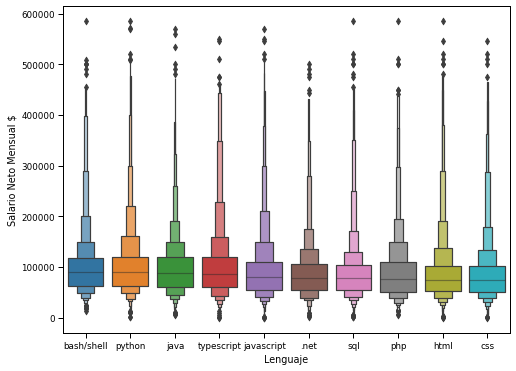

In [11]:
# Visualización del salario neto por cada lenguaje
fig = plt.figure(figsize=(8,6))


seaborn.boxenplot(x = 'programming_language', \
                y = 'salary_monthly_NETO', \
                data = df_no,
                order = ['bash/shell','python','java','typescript','javascript','.net','sql','php','html','css'])

plt.xlabel('Lenguaje')
plt.ylabel('Salario Neto Mensual $')


Aquí podemos ver que las distribuciones del salario medio entre los lenguajes clasificados como interesantes no son muy dispares. 

In [12]:
df_no1 = df_no.groupby('programming_language') 
means = df_no1.mean()
medians = df_no1.median() 
counts = df_no1.count()
programming_languages = interesting_languages.sort_values()



Text(0, 0.5, 'Cantidad de Usuarios')

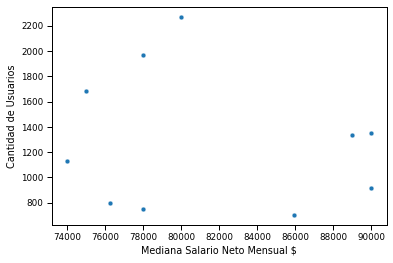

In [13]:
seaborn.scatterplot(x=medians['salary_monthly_NETO'],y=counts['salary_monthly_NETO'])
plt.xlabel('Mediana Salario Neto Mensual $')
plt.ylabel('Cantidad de Usuarios')

In [14]:
df_no1.describe()

salary_monthly_NETO                 ...                    
                                   count           mean  ...       75%       max
programming_language                                     ...                    
.net                               751.0   91517.269933  ...  105500.0  500000.0
bash/shell                         914.0  104024.995033  ...  118750.0  585000.0
css                               1133.0   89009.985693  ...  101440.0  546000.0
html                              1682.0   90965.615333  ...  102000.0  585000.0
java                              1339.0   99766.501830  ...  120000.0  570000.0
javascript                        2270.0   97309.026819  ...  110000.0  570000.0
php                                800.0   93397.084913  ...  110000.0  585000.0
python                            1353.0  106476.291722  ...  120000.0  585000.0
sql                               1969.0   90645.111127  ...  105000.0  585000.0
typescript                         706.0  105262.119759  ...  120000.0  550000.0

[10 rows x 8 columns]

En la última figura podemos ver la cantidad de personas que programas en un lenguaje contra la mediana de los salarios netos de ese grupo. Los salarios mejor pagos están en lenguajes que no tienen demasiados usuarios, particularmente en bash, java y python. Sin embargo, no se puede decir que haya relación entre la cantidad de usuarios de un lenguaje y la retribución que reciben los programadores, ya que hay lenguajes con pocos usuarios que tienen medianas de salario bajas.